# 1. CARGAR DATASET

## 1.1. Conectar Drive

In [1]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. Cargar data set: df_sports_subset.csv


In [33]:
import pandas as pd
data_sports = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/df_sports_subset2.csv')

Visualizar que está correctamente cargado

In [3]:
data_sports.head()

,sentimiento,review
0,4.0,Perfect size to fit in an emergency preparedne...
1,4.0,Great but wears out pretty quick if used a lot...
2,5.0,Great item that is superbly inexpensive for it...
3,5.0,This is a sturdily built portable practice net...
4,4.0,works good


# 2. FUNCION DE NORMALIZACION

## 2.1. Carga librerias y modelos.

In [4]:
# Instalar librerias y modelos
!pip install -U spacy download en_core_web_sm

## 2.2. Funcion normalización review.

Para normalizar vamos a:

a) Quitar signos extraños y signos de puntuación.

b) Eliminar stop words

c) Lematizar los tokens.

d) Pasar a minúsculas.

e) Eliminar links a paginas web.

f) Eliminar tokens menores de 3 caracteres.

In [34]:
# Importar librerias
import pandas as pd
import spacy
import unicodedata
from bs4 import BeautifulSoup
import re

# Cargar modelo en ingles pequeño
nlp = spacy.load('en_core_web_sm')

# Normalización Unicode para eliminar caracteres extraños
def unicode_normalize(text):
  return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def token_out(token):
  return token.is_punct or token.is_digit or token.is_stop or re.match(r"[^a-zA-Z0-9]", token.text) or len(token)<3

# Función de normalización
def normalize_text(text):
    text = unicode_normalize(text)
    text = BeautifulSoup(text, "html5lib").get_text()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    # Procesar el texto con Spacy
    doc = nlp(text)
    # Normalización de tokens
    normalized_tokens = []
    for token in doc:
        # Comprobar si es un signo de puntuación o digito o stop word
        if token_out(token):
            # Continuar
            continue

        # Tratar el resto de casos
        else:
            # lametizamos y convertir en minusculas
            normalized_tokens.append(token.lemma_.lower())


    # Unir tokens normalizados
    normalized_text = " ".join(normalized_tokens)
    return normalized_text




## 2.3. Normalizar la columna review

In [35]:
data_sports['review'] = data_sports['review'].apply(normalize_text)
data_sports.head()

<ipython-input-34-dbf526f4e8f5>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html5lib").get_text()


,sentimiento,review
0,4.0,perfect size fit emergency preparedness backpa...
1,4.0,great wear pretty quick lot rinse son swim day...
2,5.0,great item superbly inexpensive performance
3,5.0,sturdily build portable practice net change re...
4,4.0,work good


# CODIFICAR COLUMNA SENTIMIENTO

Voy a codificar las estrellas de las reviews con un 1 si son mayores o iguales a 4 y con 0 el resto.

In [36]:
data_sports['sentimiento'] = data_sports['sentimiento'].apply(lambda x: 1 if x >= 4 else 0)
data_sports.head()

,sentimiento,review
0,1,perfect size fit emergency preparedness backpa...
1,1,great wear pretty quick lot rinse son swim day...
2,1,great item superbly inexpensive performance
3,1,sturdily build portable practice net change re...
4,1,work good


In [37]:
data_sports['sentimiento'].value_counts()

sentimiento
1    15000
0    15000
Name: count, dtype: int64

# 4. GUARDAR DATA SET

In [38]:
data_sports.to_csv('/content/drive/MyDrive/keepcoding_NLP/sports_normalized2.csv')

# 5. ANALISIS DEL DATASET NORMALIZADO.

In [6]:
!pip install nltk

In [39]:
data_sports = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/sports_normalized2.csv')
data_sports.head()

,Unnamed: 0,sentimiento,review
0,0,1,perfect size fit emergency preparedness backpa...
1,1,1,great wear pretty quick lot rinse son swim day...
2,2,1,great item superbly inexpensive performance
3,3,1,sturdily build portable practice net change re...
4,4,1,work good


In [40]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [41]:
corpus = data_sports['review'].str.cat(sep=' ')

In [42]:
print('Nº token del corpus: ',len(corpus))

Nº token del corpus:  4128586


In [43]:
def most_common(review, number):
  words_nltk = review.lower().split()
  wf = Counter(words_nltk)
  return wf.most_common(number), words_nltk

[('good', 7064), ('great', 6901), ('work', 6889), ('like', 6641), ('use', 5747), ('buy', 5193), ('fit', 5108), ('time', 3886), ('product', 3853), ('look', 3615)]


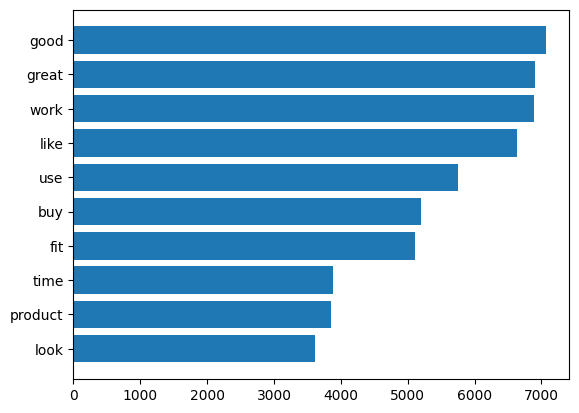

In [44]:
most_common_words, words_nltk = most_common(corpus, 10)
print(most_common_words)

words = [w[0] for w in most_common_words]
freqs = [w[1] for w in most_common_words]

freqs, words = zip(*sorted(zip(freqs, words)))

plt.barh(words, freqs)
plt.show()


In [45]:
bigrams_ = list(ngrams(words_nltk, 2))
trigrams_ = list(ngrams(words_nltk, 3))
print(bigrams_[:10])
print(trigrams_[:10])

[('perfect', 'size'), ('size', 'fit'), ('fit', 'emergency'), ('emergency', 'preparedness'), ('preparedness', 'backpack'), ('backpack', 'start'), ('start', 'come'), ('come', 'handy'), ('handy', 'camping'), ('camping', 'trip')]
[('perfect', 'size', 'fit'), ('size', 'fit', 'emergency'), ('fit', 'emergency', 'preparedness'), ('emergency', 'preparedness', 'backpack'), ('preparedness', 'backpack', 'start'), ('backpack', 'start', 'come'), ('start', 'come', 'handy'), ('come', 'handy', 'camping'), ('handy', 'camping', 'trip'), ('camping', 'trip', 'great')]


In [46]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)
print(bg_freq.most_common(10))
print(tg_freq.most_common(10))

[(('work', 'great'), 1003), (('good', 'quality'), 517), (('look', 'like'), 496), (('great', 'product'), 465), (('year', 'old'), 413), (('water', 'bottle'), 409), (('feel', 'like'), 406), (('work', 'fine'), 355), (('highly', 'recommend'), 345), (('high', 'quality'), 313)]
[(('don', 'waste', 'money'), 62), (('receive', 'product', 'discount'), 53), (('heart', 'rate', 'monitor'), 45), (('year', 'old', 'son'), 44), (('honest', 'unbiased', 'review'), 44), (('work', 'like', 'charm'), 41), (('great', 'product', 'great'), 38), (('www', 'amazon', 'com'), 35), (('buy', 'year', 'old'), 34), (('year', 'old', 'daughter'), 33)]


In [47]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

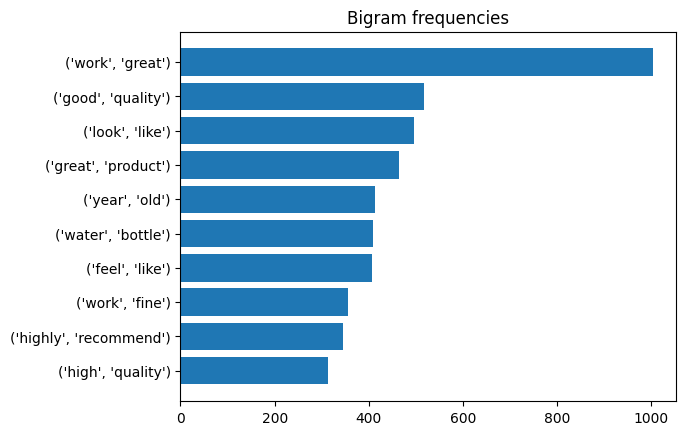

In [48]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

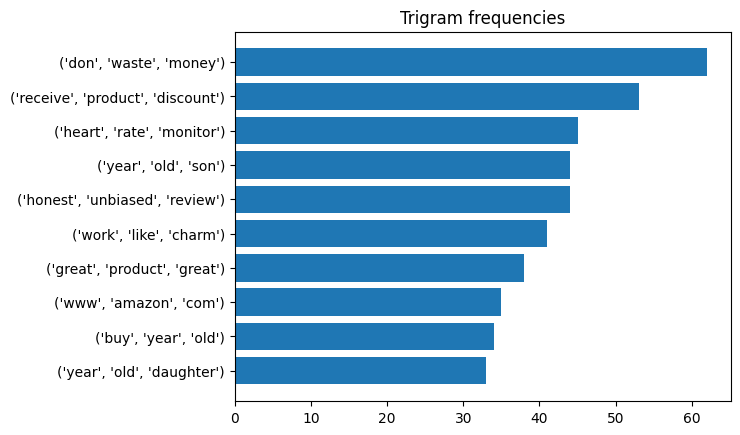

In [49]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

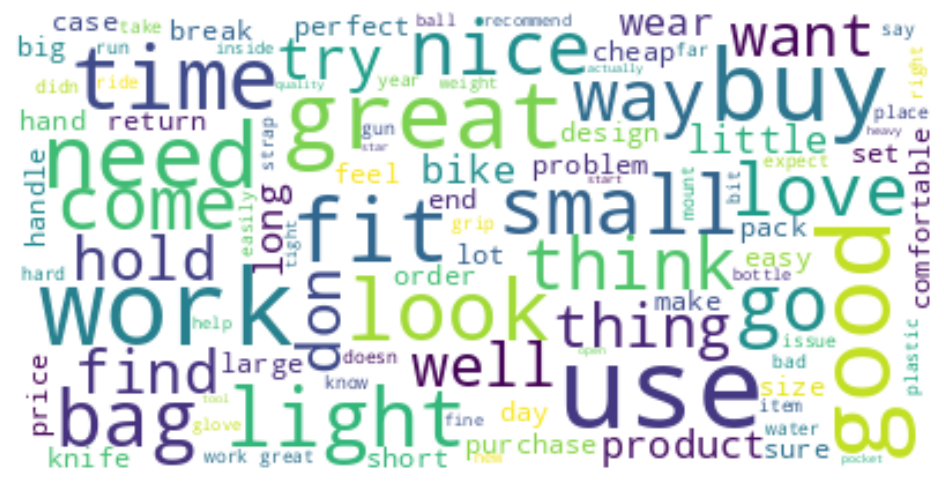

In [50]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

words_list = corpus.lower().strip().split()
plot_word_cloud(words_list)

# 6. CONCLUSIONES

Hemos mejorado el tipo de tokens útiles.

Se podŕía mejorar quitando algunos que no aportan información sobre sentimientos.